In [6]:
import pandas as pd
import numpy as np

## DSD Computation

In [7]:
! ls outputs/node2vec/

fission_yeast_biogrid_d_100_p_1_q_1_nw_10
logs
mouse_12000_biogrid_d_100_p_1_q_1_nw_10


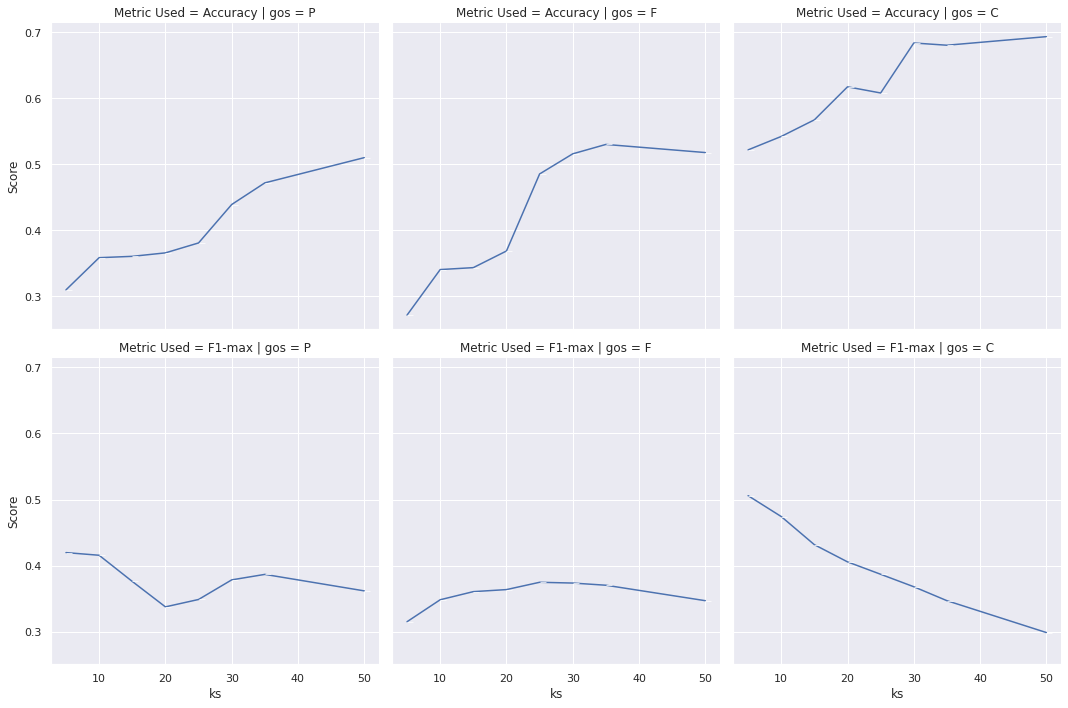

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

kdsd = [5, 10, 15, 20, 25, 30, 35, 50]
def generate_dsd_table_results(kvals, gos, folder):
    """
    Generating DSD results for different kvals
    """
    results = {"gos": [],
              "ks": [],
              "Score": [],
              "Metric Used": [],
              "std": []}
    for g in gos:
        for k in kvals:
            df = pd.read_csv(f"{folder}/{g}_k_{k}.tsv", sep = "\t")
            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("Accuracy")
            results["Score"].append(df["acc"].mean())
            results["std"].append(df["acc"].std())            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("F1-max")
            results["Score"].append(df["f1"].mean())
            results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df
dsd_df = generate_dsd_table_results(kdsd, ["P", "F", "C"], "outputs/new_data/all_outputs_folder/dsd/fission_yeast_biogrid/")
p = sns.relplot(data = dsd_df, x="ks", y = "Score", row="Metric Used", col="gos", kind = "line", marker = True)
# SAVE the figure
# p.savefig("outputs/dsd/fission_yeast_biogrid/variation_with_k.png")

## Finding the MAX terms
### DSD

In [9]:
max_map = {"org": [], "method": [], "go": [], "metric": [], "best": []}
# DSD
for org in ["fission_yeast_biogrid", "mouse_12000_biogrid"]:
    dsd_org = generate_dsd_table_results(kdsd, ["P", "F", "C"], f"outputs/dsd/{org}/")
    res = dsd_org.groupby(["Metric Used", "gos"]).agg("max")
    for i, r in res.iterrows():
        max_map["org"].append(org)
        max_map["metric"].append(i[0])
        max_map["go"].append(i[1])
        max_map["best"].append(r["Score"])
        max_map["method"].append("dsd")

max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd'],
 'go': ['C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P'],
 'metric': ['Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max',
  'Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max'],
 'best': [0.6932203389830509,
  0.5299849501313675,
  0.5099977720842153,
  0.5058166230784495,
  0.37465687936906866,
  0.41960878464474344,
  0.658135897240672,
  0.4070404172099087,
  0.34250077202670626,
  0.46869181311236174,
  0.3391035156844055,
  0.2391417495826674]}

### MASHUP

In [10]:
for org in ["fission_yeast_biogrid.mashup.dim_1000", "mouse_12000_biogrid.mashup.dim_1000"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/mashup/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("mashup")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup'],
 'go': ['C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'F',
  'F',
 

### NODE2VEC

In [11]:
for org in ["fission_yeast_biogrid_d_100_p_1_q_1_nw_10", "mouse_12000_biogrid_d_100_p_1_q_1_nw_10"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/node2vec/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("node2vec")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map
df_mmap = pd.DataFrame(max_map)
df_mmap

,org,method,go,metric,best
0,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
1,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
2,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
3,fission_yeast_biogrid,dsd,C,F1-max,0.505817
4,fission_yeast_biogrid,dsd,F,F1-max,0.374657
5,fission_yeast_biogrid,dsd,P,F1-max,0.419609
6,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
7,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
8,mouse_12000_biogrid,dsd,P,Accuracy,0.342501
9,mouse_12000_biogrid,dsd,C,F1-max,0.468692


In [12]:
df_mmap["id"] = df_mmap["org"] + "-" + df_mmap["method"] + "-" + df_mmap["go"] + "-" + df_mmap["metric"]
df_mmap       = df_mmap.set_index("id")


In [13]:
df_mmap

,org,method,go,metric,best
id,,,,,
fission_yeast_biogrid-dsd-C-Accuracy,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
fission_yeast_biogrid-dsd-F-Accuracy,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
fission_yeast_biogrid-dsd-P-Accuracy,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
fission_yeast_biogrid-dsd-C-F1-max,fission_yeast_biogrid,dsd,C,F1-max,0.505817
fission_yeast_biogrid-dsd-F-F1-max,fission_yeast_biogrid,dsd,F,F1-max,0.374657
fission_yeast_biogrid-dsd-P-F1-max,fission_yeast_biogrid,dsd,P,F1-max,0.419609
mouse_12000_biogrid-dsd-C-Accuracy,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
mouse_12000_biogrid-dsd-F-Accuracy,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
mouse_12000_biogrid-dsd-P-Accuracy,mouse_12000_biogrid,dsd,P,Accuracy,0.342501


In [29]:
import pandas as pd

mks = [10,20,30,50]
ks  = [10, 15, 20, 25, 30, 35]
alphas = ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]
munk_dim=[20,50,100,150,200,250,300,500,1000,2000]
falphas = [float(a) for a in alphas]

def generate_table_results(kvals, munk_dim, alphas, gos, folder, align_type):
    """
    Generating the table from alphas and kvals
    """
    results = {"gos": [], 
               "ks": [], 
               "alphas": [], 
               "Metric Used": [], 
               "Score": [], 
               "mks": [],
               "align_type": [],
               "munk_dim": [],
               "std": []}
    for go in gos:
        print(f"\tGO: {go}")
        for k in ks:
            print(f"\t\t K: {k}")
            for mk in mks:
                print(f"\t\t MK: {mk}")
                for a in alphas:
                    for mdim in munk_dim:
                        for score in ["Accuracy", "F1-max"]:
                            results["Metric Used"].append(score)
                            results["gos"].append(go)
                            results["ks"].append(k)
                            results["mks"].append(mk)
                            results["alphas"].append(float(a))
                            results["align_type"].append(align_type)
                            results["munk_dim"].append(mdim)
                            df = pd.read_csv(f"{folder}/{go}_k_{mk}:{k}_alpha_{a}_landmark_{mdim}.tsv", sep = "\t")
                            if score == "Accuracy":
                                results["Score"].append(df["acc"].mean())
                                results["std"].append(df["acc"].std())
                            elif score == "F1-max":
                                results["Score"].append(df["f1"].mean())
                                results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df

### UNIMUNDO - FISSION-BAKERS

In [30]:
df_fb = generate_table_results(ks, 
                               munk_dim,
                               alphas, 
                               ["P", "F", "C"], 
                               "outputs/glide/bakers_yeast_biogrid-fission_yeast_biogrid/hubalign+blast/",
                               "hubalign+blast")
df_fb

	GO: P
		 K: 10
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 15
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 20
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 25
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 30
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 35
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
	GO: F
		 K: 10
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 15
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 20
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 25
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 30
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 35
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
	GO: C
		 K: 10
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 15
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 20
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 25
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 30
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50
		 K: 35
		 MK: 10
		 MK: 20
		 MK: 30
		 MK: 50


,gos,ks,alphas,Metric Used,Score,mks,align_type,munk_dim,std
0,P,10,0.0,Accuracy,0.357441,10,hubalign+blast,20,0.036354
1,P,10,0.0,F1-max,0.410323,10,hubalign+blast,20,0.034360
2,P,10,0.0,Accuracy,0.355180,10,hubalign+blast,50,0.041177
3,P,10,0.0,F1-max,0.404282,10,hubalign+blast,50,0.030964
4,P,10,0.0,Accuracy,0.361496,10,hubalign+blast,100,0.023386
...,...,...,...,...,...,...,...,...,...
8635,C,35,1.0,F1-max,0.243773,50,hubalign+blast,500,0.008613
8636,C,35,1.0,Accuracy,0.583051,50,hubalign+blast,1000,0.021360
8637,C,35,1.0,F1-max,0.241941,50,hubalign+blast,1000,0.006965
8638,C,35,1.0,Accuracy,0.553955,50,hubalign+blast,2000,0.025724


In [31]:
# df_c = df_hm.groupby(["gos", "ks", "munk_dim", "Metric Used", "align_type"], as_index= False).aggregate("max")
df_c = df_fb.drop(["std"], axis = 1)
df_c

,gos,ks,alphas,Metric Used,Score,mks,align_type,munk_dim
0,P,10,0.0,Accuracy,0.357441,10,hubalign+blast,20
1,P,10,0.0,F1-max,0.410323,10,hubalign+blast,20
2,P,10,0.0,Accuracy,0.355180,10,hubalign+blast,50
3,P,10,0.0,F1-max,0.404282,10,hubalign+blast,50
4,P,10,0.0,Accuracy,0.361496,10,hubalign+blast,100
...,...,...,...,...,...,...,...,...
8635,C,35,1.0,F1-max,0.243773,50,hubalign+blast,500
8636,C,35,1.0,Accuracy,0.583051,50,hubalign+blast,1000
8637,C,35,1.0,F1-max,0.241941,50,hubalign+blast,1000
8638,C,35,1.0,Accuracy,0.553955,50,hubalign+blast,2000


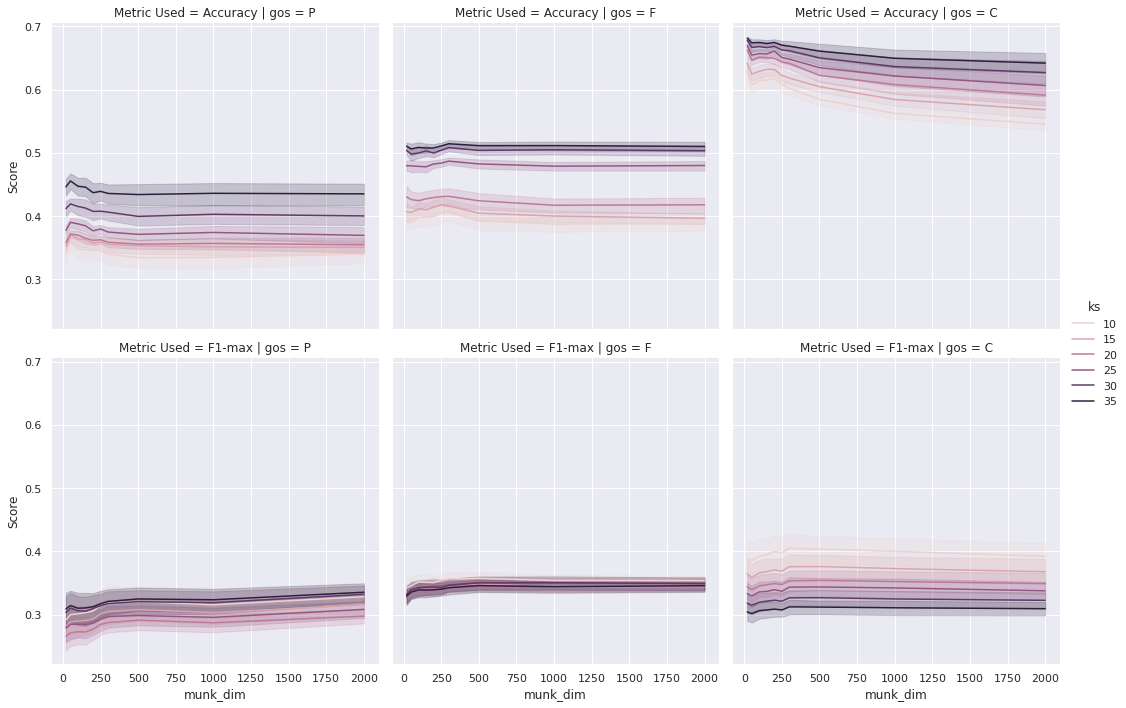

In [33]:
import seaborn as sns
sns.relplot(data = df_c, x= "munk_dim", y = "Score", row = "Metric Used", col = "gos", hue = "ks", kind = "line")